# Hepstat_Tutorial_Histfactory
Histfactory example. The model is basically the same as [hepstat_tutorial_roofit_extended.py](https://gitee.com/lailinxu/hepstat-tutorial/blob/master/Fitting/hepstat_tutorial_roofit_extended.py.nbconvert.ipynb): i.e, composite p.d.f with signal and background component
```
pdf = n_bkg * bkg(x,a0,a1) + mu * n_sig * (f_sig1 * sig1(x,m,s1 + (1-f_sig1) * sig2(x,m,s2)))
```
 with following objectives:
 * Create a workspace using Workspace Factory
 * Example operations at the workspace level

See also the example code [rf511_wsfactory_basic.py](https://root.cern/doc/master/rf511__wsfactory__basic_8py.html)




**Author:** Lailin XU  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Saturday, April 03, 2021 at 10:27 AM.</small></i>

Import the ROOT libraries

In [1]:
import ROOT as R
from math import pow, sqrt
R.gROOT.SetStyle("ATLAS")

Welcome to JupyROOT 6.22/07


Setup component pdfs
---------------------------------------

Instantiate a workspace

In [2]:
w = R.RooWorkspace("w")


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Create pdf components
  A single syntax exists to instantiate all RooFit pdf and function classes
  ClassName::objectname(…) creates an instance of ClassName with the given object name (and identical title).

In [3]:
w.factory("Chebychev::bkg(x[0,10],{a0[0.5,0.,1],a1[-0.2,0.,1.]})")
w.factory("Gaussian::sig1(x,mean[5.],width1[0.5])")
w.factory("Gaussian::sig2(x,mean,width2[1.0])")

Create the total model

In [4]:
w.factory("expr::sig2frac('1.-sig1frac',sig1frac[0.8,0,1.])")
w.factory("SUM::sig(sig1frac*sig1,sig2frac*sig2)")
w.factory("expr::S('mu_sig*nsig',mu_sig[1,0,10],nsig[500])")
w.factory("SUM::model(S*sig,nbkg[1000,0,1000]*bkg)")

x = w.var("x")
model = w.pdf("model")
model.Print()

RooAddPdf::model[ S * sig + nbkg * bkg ] = 1


Generate pseudo data via sampling

In [5]:
data = model.generate(x, 1000)

Fit and plot model
---------------------------------------------------

In [6]:
myc = R.TCanvas("c", "c", 800, 600)
myc.SetFillColor(0)
myc.cd()

Fit model to data

In [7]:
model.fitTo(data)

[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization -- createNLL: caching constraint set under name CONSTR_OF_PDF_model_FOR_OBS_x with 0 entries
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (sig1,sig2)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (bkg)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a0           5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     2 a1           0.00000e+00  1.00000e-01    0.00000e+00  1.00000e+00
 MINUIT WARNING IN PARAM DEF
 ============== STARTING VALUE IS AT LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE2 IS AT I

Plot data and PDF overlaid

In [8]:
xframe = x.frame(R.RooFit.Title("Example of composite pdf=(sig1+sig2)+bkg"))
data.plotOn(xframe, R.RooFit.Name('Data'))
model.plotOn(xframe, R.RooFit.Name('Full_Model'), R.RooFit.LineColor(R.kBlue))
xframe.Draw()
ymax = xframe.GetMaximum()
xframe.SetMaximum(ymax*1.2)

xframe.Draw()

Overlay teh bkg component

In [9]:
ras_bkg = R.RooArgSet(w.obj("bkg"))
model.plotOn(xframe, R.RooFit.Components(ras_bkg), R.RooFit.LineStyle(R.kDashed), R.RooFit.LineColor(R.kRed), R.RooFit.Name('Bkg'))
xframe.Draw()

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()


Overlay the signal components of model with a dotted line

In [10]:
ras_sig1 = R.RooArgSet(w.obj("sig1"))
model.plotOn(xframe, R.RooFit.Components(ras_sig1), R.RooFit.LineStyle(R.kDotted), R.RooFit.LineColor(R.kMagenta), R.RooFit.Name('Sig1'))
xframe.Draw()
ras_sig2 = R.RooArgSet(w.obj("sig2"))
model.plotOn(xframe, R.RooFit.Components(ras_sig2), R.RooFit.LineStyle(R.kDotted), R.RooFit.LineColor(R.kGreen+2), R.RooFit.Name('Sig2'))
xframe.Draw()

myc.Update()
myc.SaveAs("test_histfactory_1.png")

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (sig1)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: (sig)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (sig2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: (sig)


Info in <TCanvas::Print>: png file test_histfactory_1.png has been created


Import the Model and Data to a workspace
---------------------------------------------------

In [11]:
w.Import(data, R.RooFit.Rename("ObsData"))

False

[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing dataset modelData
[#1] INFO:ObjectHandling -- RooWorkSpace::import(w) changing name of dataset from  modelData to ObsData


Create the ModelConfig

In [12]:
mc=R.RooStats.ModelConfig("ModelConfig", w)

Set up the Model

In [13]:
mc.SetPdf(w.pdf("model"))
mc.SetParametersOfInterest(w.var("mu_sig"))
mc.SetNuisanceParameters(R.RooArgSet(w.var("a0"), w.var("a1"), w.var("sig1frac"), w.var("nbkg")))
mc.SetObservables(w.var("x"))

mc.Print()

w.Import(mc)

False


=== Using the following for ModelConfig ===
Observables:             RooArgSet:: = (x)
Parameters of Interest:  RooArgSet:: = (mu_sig)
Nuisance Parameters:     RooArgSet:: = (a0,a1,sig1frac,nbkg)
PDF:                     RooAddPdf::model[ S * sig + nbkg * bkg ] = 1



Take a peek at the workspac

In [14]:
w.Print("t")


RooWorkspace(w) w contents

variables
---------
(a0,a1,mean,mu_sig,nbkg,nsig,sig1frac,width1,width2,x)

p.d.f.s
-------
RooAddPdf::model[ S * sig + nbkg * bkg ] = 1
  RooAddPdf::sig[ sig1frac * sig1 + sig2frac * sig2 ] = 1
    RooGaussian::sig1[ x=x mean=mean sigma=width1 ] = 1
    RooGaussian::sig2[ x=x mean=mean sigma=width2 ] = 1
    RooFormulaVar::sig2frac[ actualVars=(sig1frac) formula="1.-x[0]" ] = 0.228137
  RooFormulaVar::S[ actualVars=(mu_sig,nsig) formula="x[0]*x[1]" ] = 357.13
  RooChebychev::bkg[ x=x coefList=(a0,a1) ] = 1

datasets
--------
RooDataSet::ObsData(x)

named sets
----------
ModelConfig_NuisParams:(a0,a1,sig1frac,nbkg)
ModelConfig_Observables:(x)
ModelConfig_POI:(mu_sig)

generic objects
---------------
RooStats::ModelConfig::ModelConfig



Write the workspace to a file

In [15]:
w.writeToFile("test_model.root") 

False

Questions:
---------------------------------------------------
* What is inside this root file?
* What can I do with it?

Draw all canvases 

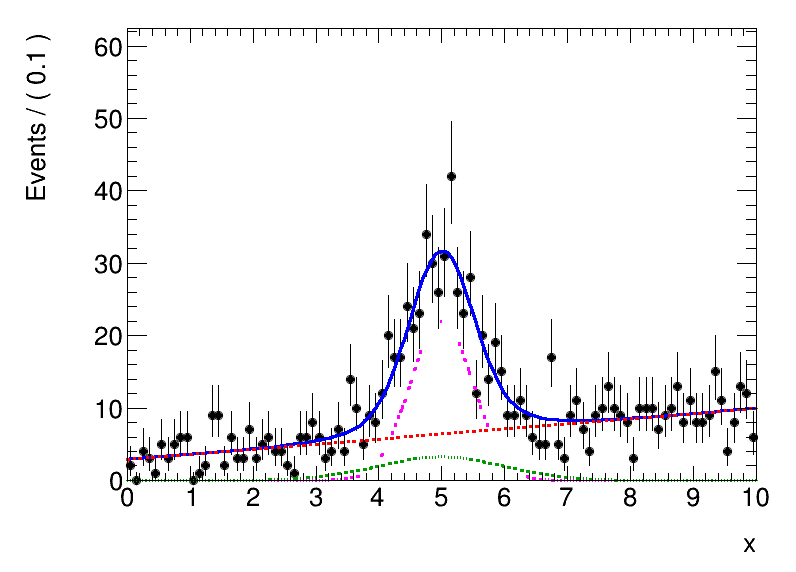

In [16]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()